## Titanic Project

In [ ]:
# Impoting Required Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score , classification_report , ConfusionMatrixDisplay

### 1. Data

In [ ]:
# Getting our Data Ready

df_train=pd.read_csv("Titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Exploring our Data

In [ ]:
# Checking Null values

df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Length of Dataset

len(df_train)

891

In [ ]:
# Dataset Info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Dataset Description

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Droping cabin Column Due to Heavy Values

df_train.drop("Cabin",axis=1,inplace=True)

In [ ]:
# Ticket Column Info

df_train.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [ ]:
# Droping Name and Ticket Column Because They are Not Categorical

df_train.drop(["Name","Ticket"],axis=1,inplace=True)

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Age Column Details

df_train.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
# Embarked Column Details

df_train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### 3. Plotting our Data

In [ ]:
# Age Vs Survived

pd.crosstab(df_train.Age , df_train.Survived)

Survived,0,1
Age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
...,...,...
70.00,2,0
70.50,1,0
71.00,2,0


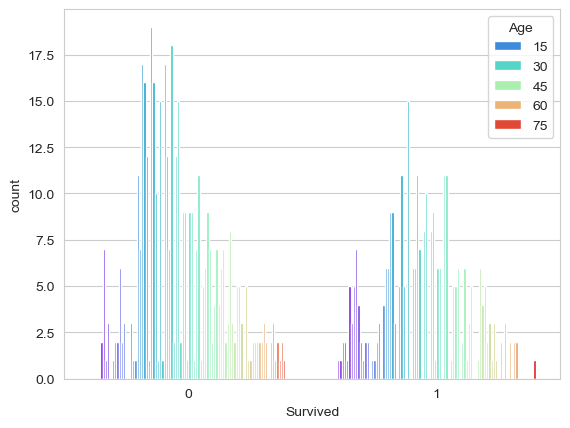

In [ ]:
# Plotting Age Vs Survived

sns.set_style("whitegrid")
sns.countplot(data=df_train , x="Survived" , hue="Age" , palette="rainbow");

In [ ]:
# Sex Vs Survived

pd.crosstab(df_train.Sex , df_train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


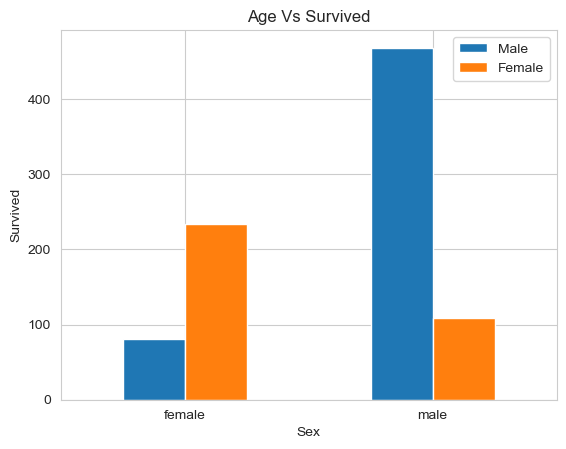

In [ ]:
# Plotting Sex Vs Survived

pd.crosstab(df_train.Sex , df_train.Survived).plot(kind="bar");
plt.xlabel("Sex");
plt.ylabel("Survived");
plt.legend(["Male" , "Female"]);
plt.title("Age Vs Survived");
plt.xticks(rotation=0);

In [ ]:
# Embared Vs Survived

pd.crosstab(df_train.Embarked , df_train.Survived)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


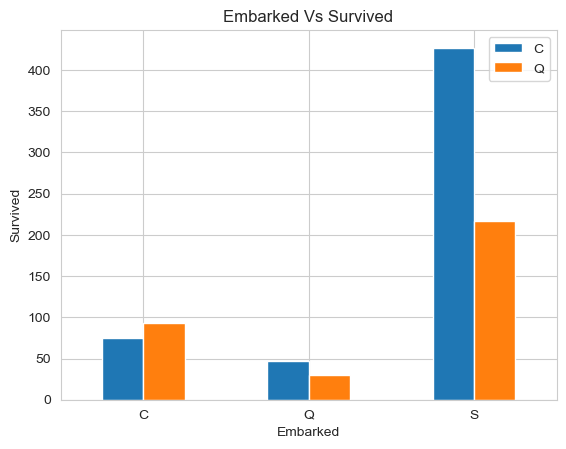

In [ ]:
# Plotting Embarked Vs Survived

pd.crosstab(df_train.Embarked , df_train.Survived).plot(kind="bar");
plt.xlabel("Embarked");
plt.ylabel("Survived");
plt.legend(["C" , "Q" , "S"]);
plt.title("Embarked Vs Survived");
plt.xticks(rotation=0);

### 4. Data Cleaning

#### 1. Train Data Cleaning

In [ ]:
# Missing Values Counts

df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [ ]:
# Filling Numerical Values

for key,value in df_train.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            df_train[key]=value.fillna(value.median())

In [ ]:
# Filling Categorical Values

df_train["Embarked"]=df_train["Embarked"].fillna("S")

In [ ]:
# Missing Values Counts

df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Changing String to Numerical Values

for key,value in df_train.items():
    i=0
    dic={}
    if value.dtype=="O":
        lis=list(df_train[key].unique())
        for j in lis:
           dic[j]=i
           i+=1
        for k,l in dic.items():
            df_train[key].replace(k,l,inplace=True)

C:\Users\RaghunandhanG22BME07\AppData\Local\Temp\ipykernel_2768\3007664664.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train[key].replace(k,l,inplace=True)


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [ ]:
# Dataset Info

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


#### 2. Test Data Cleaning

In [ ]:
# Getting our Test Data

df_test=pd.read_csv("Titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Dataset Info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
# Dropping Some Columns like Name , Ticket , Cabin

df_test.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [ ]:
# Counting Missing Values

df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [ ]:
# Filling Numerical Values

for key,value in df_test.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            df_test[key]=value.fillna(value.median())

In [ ]:
# Counting Missing Values

df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Changing String to Numerical Values

for key,value in df_test.items():
    i=0
    dic={}
    if value.dtype=="O":
        lis=list(df_test[key].unique())
        for j in lis:
           dic[j]=i
           i+=1
        for k,l in dic.items():
            df_test[key].replace(k,l,inplace=True)

C:\Users\RaghunandhanG22BME07\AppData\Local\Temp\ipykernel_2768\2958839850.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test[key].replace(k,l,inplace=True)


In [ ]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,0
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,0
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


In [ ]:
X_test=df_test
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,0
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,0
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


### 5. Splitting Data

In [ ]:
# Splitting our Data to X and y

X_train=df_train.drop("Survived" , axis=1)
y_train=df_train.Survived

### 6. Modelling

#### 1. Linear Regression

In [ ]:
#Fitting our Data and Make Predictions

model1=LinearRegression()
model1.fit(X_train,y_train)
y_pre1=model1.predict(X_test)

#### 2. Logistic Regression

In [ ]:
#Fitting our Data and Make Predictions

model2=LogisticRegression()
model2.fit(X_train,y_train)
y_pre2=model2.predict(X_test)

C:\Users\RaghunandhanG22BME07\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3. Random Forest Classifier

In [ ]:
#Fitting our Data and Make Predictions

model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_pre3=model3.predict(X_test)

### 7. Prediction

In [ ]:
# Putting into Dataframe as Passenger and Survived

Linpre=pd.DataFrame({"Passenger Id" : X_test.PassengerId, "Survived" : y_pre1})
Logpre=pd.DataFrame({"Passenger Id" : X_test.PassengerId, "Survived" : y_pre2})
Ranpre=pd.DataFrame({"Passenger Id" : X_test.PassengerId, "Survived" : y_pre3})

In [ ]:
# Linear Regression Prediction

Linpre["Survived"]=np.where(Linpre["Survived"]>=0.5,1,0)
Linpre.head()

,Passenger Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Logistic Regression Prediction

Logpre["Survived"]=np.where(Logpre["Survived"]>=0.5,1,0)
Logpre.head()

,Passenger Id,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Random Forest Classifier Prediction

Ranpre["Survived"]=np.where(Ranpre["Survived"]>=0.5,1,0)
Ranpre.head()

,Passenger Id,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
